In [38]:
from pathlib import Path
from collections import Counter
from PIL import Image
import pandas as pd

WSIROI_PATH = "data/wsirois/roi-level-annotations/tissue-cells/tissue-cells/"
paths = [path.parts[-2:] for path in Path(WSIROI_PATH).rglob('*.*')]

In [39]:
df = pd.DataFrame(data=paths, columns=['Class','Images'])
df.drop(df.index[0], inplace=True)
df = df.sort_values('Class',ascending=True)
df.reset_index(drop=True, inplace=True)

In [40]:
df

Class                                             Images
0     images              100B_[10779, 11621, 12102, 12874].png
1     images  TCGA-E2-A1LH-01Z-00-DX1.F85384B7-1EBF-4F57-A45...
2     images  TCGA-E2-A1LH-01Z-00-DX1.F85384B7-1EBF-4F57-A45...
3     images  TCGA-E2-A1LH-01Z-00-DX1.F85384B7-1EBF-4F57-A45...
4     images  TCGA-E2-A1LH-01Z-00-DX1.F85384B7-1EBF-4F57-A45...
...      ...                                                ...
3753   masks  TCGA-AN-A0AT-01Z-00-DX1.DFD68CD2-C25E-47BE-BC0...
3754   masks  TCGA-AN-A0AT-01Z-00-DX1.DFD68CD2-C25E-47BE-BC0...
3755   masks  TCGA-AN-A0AT-01Z-00-DX1.DFD68CD2-C25E-47BE-BC0...
3756   masks  TCGA-AN-A0G0-01Z-00-DX1.BE0BB5DF-DEDA-48D8-B5D...
3757   masks  TC_S01_P000183_C0001_B101_[112201, 88004, 1134...

[3758 rows x 2 columns]

In [41]:
df.describe()

Class                                             Images
count     3758                                               3758
unique       2                                               1879
top     images  TCGA-AN-A0AT-01Z-00-DX1.DFD68CD2-C25E-47BE-BC0...
freq      1879                                                  2

In [42]:
df['Class'].value_counts()

Class
images    1879
masks     1879
Name: count, dtype: int64

In [43]:
directories = {
    "images": WSIROI_PATH + "images/",
    "masks": WSIROI_PATH + "masks/",
}


def get_dimensions_images(file):
    image = Image.open(file)
    arr = np.array(image)
    height, width, dims = arr.shape
    return height, width
    
def get_dimensions_masks(file):
    image = Image.open(file)
    arr = np.array(image)
    height, width = arr.shape
    return height, width

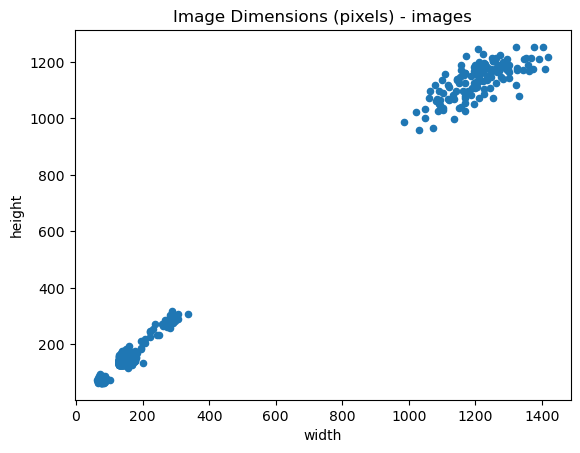

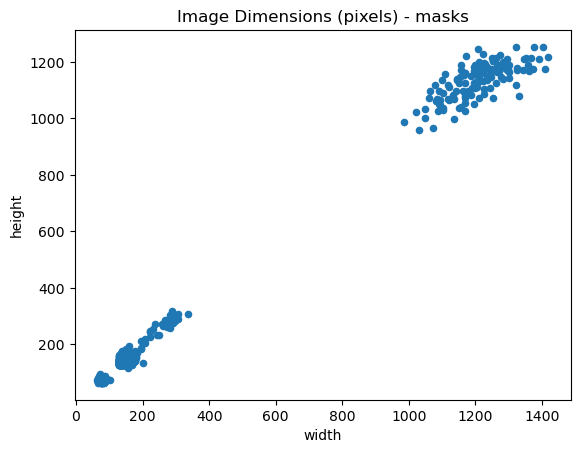

In [44]:
import os
import dask.bag as db
import numpy as np
import matplotlib.pyplot as plt

for label, directory in directories.items():
    filepath = directory
    filelist = [filepath + f for f in os.listdir(filepath)]
    if label == "images":
        dims = db.from_sequence(filelist).map(get_dimensions_images)
    elif label == "masks":
        dims = db.from_sequence(filelist).map(get_dimensions_masks)
        
    dims = dims.compute()
    dim_df = pd.DataFrame(dims, columns=['height', 'width'])
    sizes = dim_df.groupby(['height', 'width']).size().reset_index().rename(columns={0:'count'})
    sizes.plot.scatter(x='width', y='height');
    plt.title('Image Dimensions (pixels) - {}'.format(label))

In [45]:
filepath = WSIROI_PATH + "images/"
filelist = [filepath + f for f in os.listdir(filepath)]

dims = db.from_sequence(filelist).map(get_dimensions_images)
dims = dims.compute()
df_dims = pd.DataFrame(dims, columns=["height", "width"])
df_dims.head()


height  width
0    1253   1323
1    1180   1295
2    1190   1300
3    1180   1212
4    1166   1224

In [47]:
aspect_ratios = []
for i in dims:
    aspect_ratios.append(i[1]/i[0])

df_aspect_ratios = pd.DataFrame(aspect_ratios, columns=["Aspect Ratio"])
df_aspect_ratios.head()

Aspect Ratio
0      1.055866
1      1.097458
2      1.092437
3      1.027119
4      1.049743

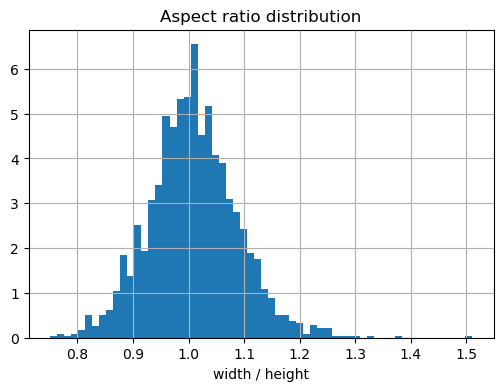

In [48]:
plt.figure(figsize=(6,4))
plt.hist(df_aspect_ratios, bins=60, density=True)
plt.xlabel("width / height")
plt.title("Aspect ratio distribution")
plt.grid(True)
plt.show()

In [ ]:
filepath = WSIROI_PATH + "images/"
directory = Path(filepath)

files = list(directory.rglob("*.*"))

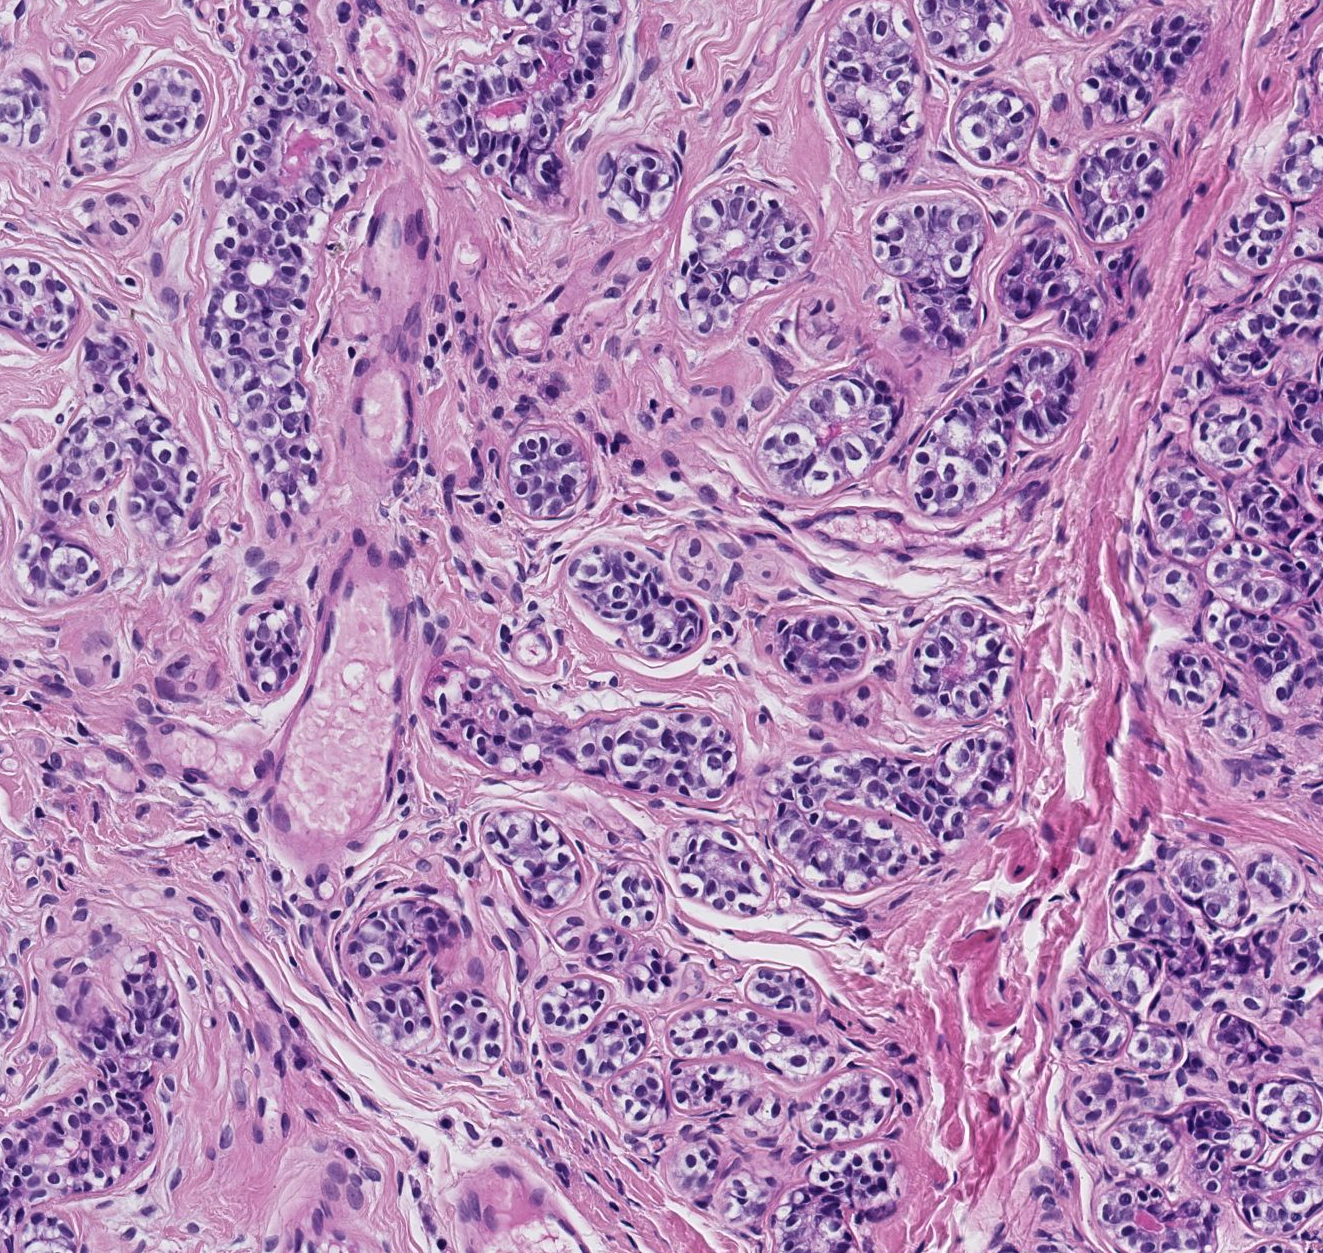

In [54]:
head_image = files[0]
Image.open(head_image)

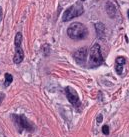

In [ ]:
import random
random_image = random.choice(files)
Image.open(random_image)

In [60]:
import json
tissue_cells_dict = json.load(open(os.path.join(WSIROI_PATH, "tiger-coco.json")))

In [73]:
def print_dict(obj):
    if type(obj) == list:
        for i in obj:
            print("=================")
            for label, value in i.items():
                print(f"{label}: {value}")
        print("=================")
    else:
        print("=================")
        for label, value in obj.items():
            print(f"{label}: {value}")
        print("=================")

In [74]:
print(f"Number of Images: {len(tissue_cells_dict['images'])}\n")
print("Image 100:\n")
print_dict(dict(list(filter((lambda x: x['id'] == 165),tissue_cells_dict['images']))[0]))

Number of Images: 1879

Image 100:

id: 165
file_name: ./images/TC_S01_P000078_C0001_B101_[40556, 80197, 41828, 81364].png
height: 1167
width: 1272
date_captured: 16-12-2021 10:30:43
